<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_02_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02. 여러가지 확률 분포
---
* 날짜: 2022-05-04
* 이름: 고민수

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 지수 분포
      - 정규 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.stats import *
import seaborn as sns
plt.rc("font", family="Noto Sans KR", size=9) # 한글 폰트 설정
plt.rc("figure", figsize=(10,7))

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [163]:
mu, std = 0, 1 # 표준 정규분포
norm = sp.stats.norm(mu, std) # 확률 함수

* 확률 분포


In [3]:
X = np.linspace(-5,5,1000)
P_X = norm.pdf([X])

* 누적 확률 분포


In [4]:
F_X = norm.cdf(P_X)

* 표본 추출

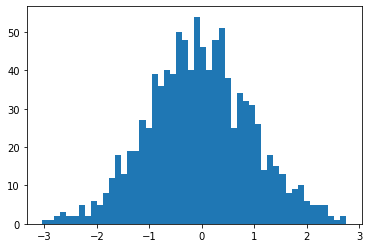

In [5]:
rvs = norm.rvs(1000, random_state=0)
_=plt.hist(rvs, bins=50)

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

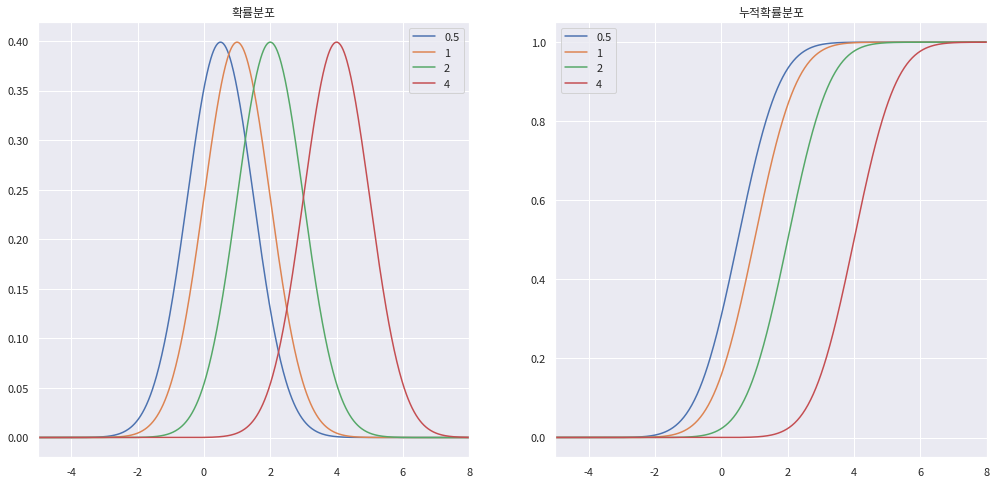

In [172]:
mus = [0.5, 1, 2, 4]  # 평균 list
std = 1 # 표준편차 1 고정
X = np.linspace(-10,10, 1000) # 범위

fig, axes = plt.subplots(1,2, figsize=(17,8)) # 플롯 2개를 담을 도화지

for mu in mus:
    norm = sp.stats.norm(mu, std) # 정규분포
    
    P_X = norm.pdf(X) # 정규분포의 확률분포
    F_X = norm.cdf(X) # 정규분포의 누적확률분포
    
    # 플롯
    axes[0].plot(X, P_X)
    axes[1].plot(X, F_X)
    
    # x 축
    axes[0].set_xlim(-5,8) 
    axes[1].set_xlim(-5,8)

# 타이틀
axes[0].set_title("확률분포")
axes[1].set_title("누적확률분포")

# 범례
axes[0].legend(mus)
axes[1].legend(mus)

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

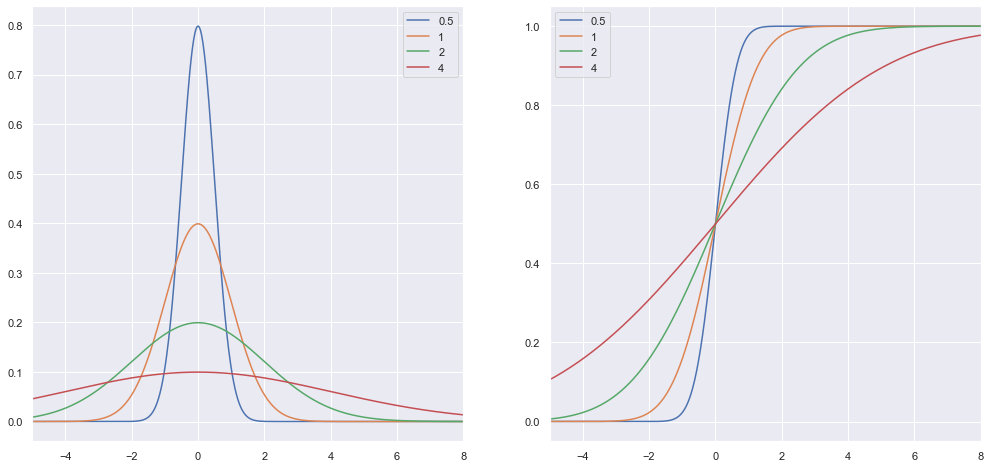

In [7]:
mu = 0
stds = [0.5,1,2,4]

X = np.linspace(-10,10, 1000)

fig, axes = plt.subplots(1,2, figsize=(17,8))
for std in stds:
    norm = sp.stats.norm(mu, std)
    P_X = norm.pdf(X)
    F_X = norm.cdf(X)
    axes[0].plot(X, P_X)
    axes[1].plot(X, F_X)

    axes[0].set_xlim(-5,8)
    axes[1].set_xlim(-5,8)
axes[0].legend(stds)
axes[1].legend(stds)

#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

Text(0.5, 1.0, 'c.d.f')

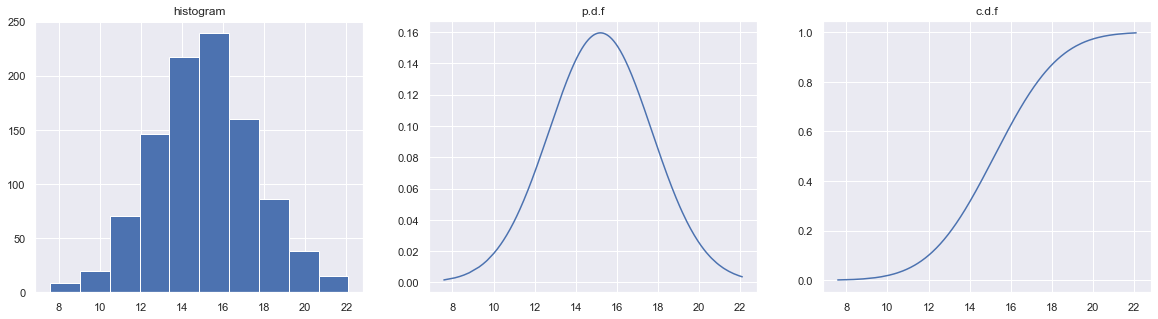

In [8]:
# 평균, 표준편차
mu = 15.2
std = 2.5

# 확률 함수 생성
norm = sp.stats.norm(mu, std)

# 표본추출
rvs = norm.rvs(1000, random_state=0)
rvs.sort()

# 도화지(틀) 생성
fig, axes = plt.subplots(1,3, figsize=(20,5))

P_X = norm.pdf(rvs)
F_X = norm.cdf(rvs)

axes[0].hist(rvs)
axes[1].plot(rvs, P_X)
axes[2].plot(rvs, F_X)

axes[0].set_title("histogram")
axes[1].set_title("p.d.f")
axes[2].set_title("c.d.f")

### **| 카이제곱 분포**

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [27]:
dfs = [10,20,30,40,50]

* 확률 분포


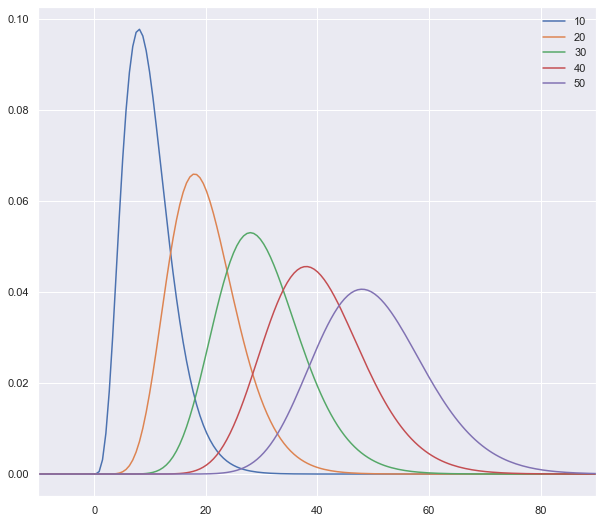

In [28]:
dfs = [10,20,30,40,50]
x = np.linspace(-90,90, 300)
# 도화지 객체
fig, axes = plt.subplots(1, 1)

for df in dfs:
    axes.plot(x, chi2.pdf(x, df), label=f'{df}')
axes.legend(loc='best', frameon=False)
axes.set_xlim(-10,90)
plt.show()

* 누적 확률 분포


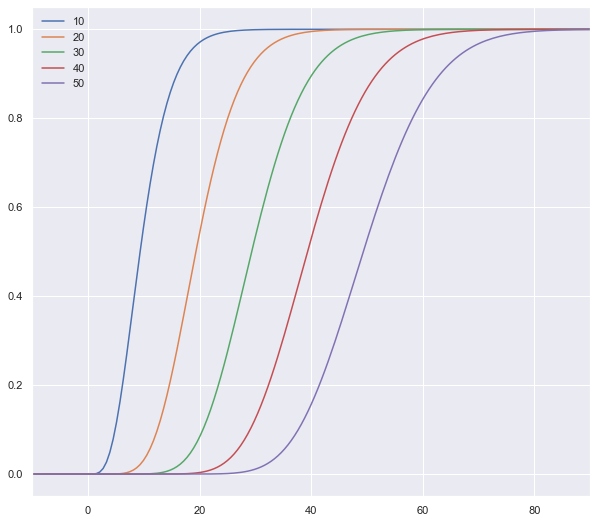

In [29]:
fig, axes = plt.subplots(1, 1)

for df in dfs:
    axes.plot(x,chi2.cdf(x, df, scale=1), label=f'{df}')
axes.legend(loc='best', frameon=False)
axes.set_xlim(-10,90)
plt.show()

* 표본 추출


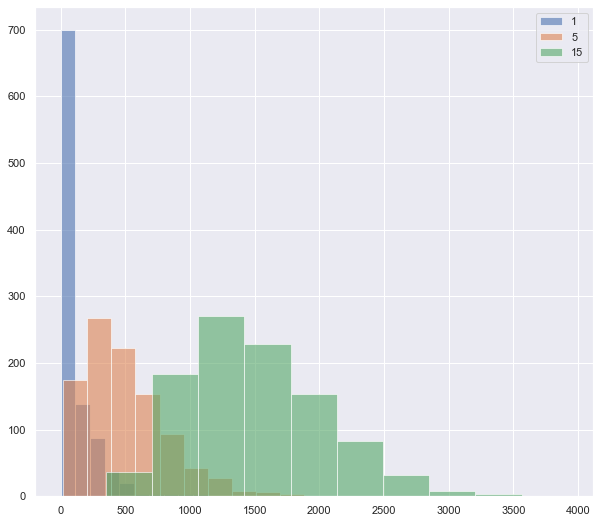

In [30]:
fig, axes = plt.subplots(1, 1)
dfs = [1,5,15]
for df in dfs:
    rvs = chi2.rvs(df, loc=0, scale=100, size=1000, random_state=None)
    axes.hist(rvs, label=f"{df}", alpha=0.6)
axes.legend()

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

* a 값이 1이면 뾰족하고 값이 클수록 완만하다.
* 0 이전 값은 0 이고 x 값이 커질수록 0에 수렴한다.
* a 값이 커질수록 최대값은 작아진다.

In [51]:
A = [1,2,4,8,16] 
x = np.linspace(-5,100, 300)

In [53]:
gamma.ppf(0.01, A[0])

0.010050335853501437

* 확률 분포

(-5.0, 40.0)

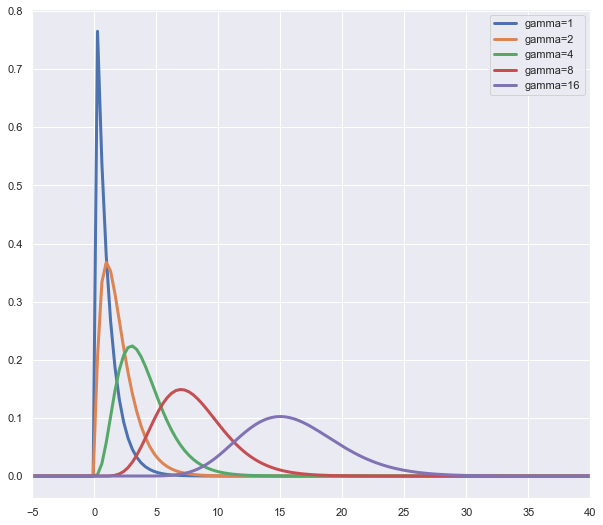

In [48]:
fig, ax = plt.subplots(1, 1)
for a in A:
    ax.plot(x, gamma.pdf(x, a), lw=3, label=f'gamma={a}')
ax.legend()
ax.set_xlim(-5,40)

* 누적 확률 분포


(-5.0, 40.0)

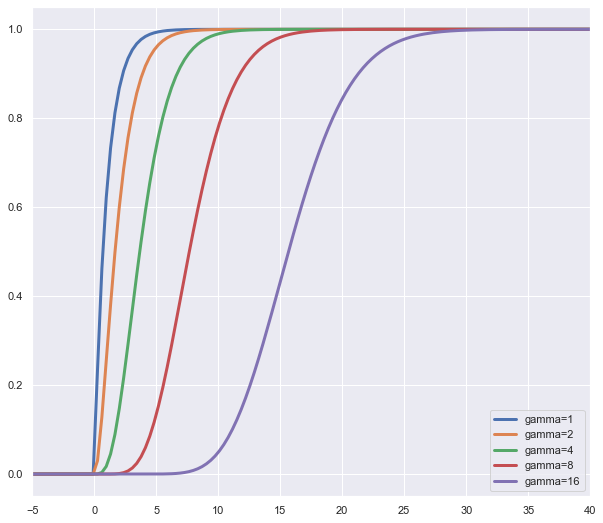

In [49]:
fig, ax = plt.subplots(1, 1)
for a in A:
    ax.plot(x, gamma.cdf(x, a), lw=3, label=f'gamma={a}')
ax.legend()
ax.set_xlim(-5,40)

* 표본 추출

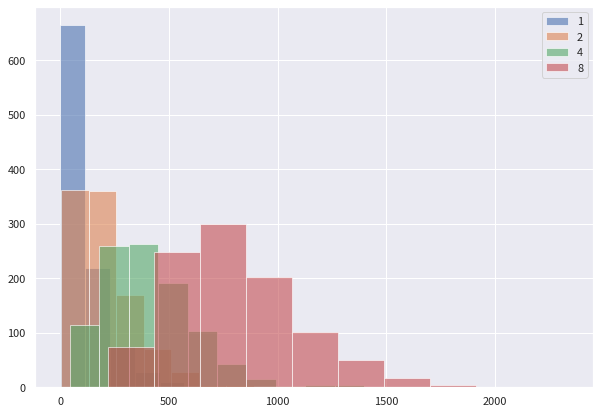

In [173]:
fig, axes = plt.subplots(1, 1)
A = [1,2,4,8]
for a in A:
    rvs = gamma.rvs(a, loc=0, scale=100, size=1000, random_state=None)
    axes.hist(rvs, label=f"{a}", alpha=0.6)
axes.legend()

### 지수분포 - exponnorm

* 확률분포

In [61]:
expon.ppf(0.01)
x = np.linspace(-20,50,300)
K = [1,2,5,10]

(-10.0, 40.0)

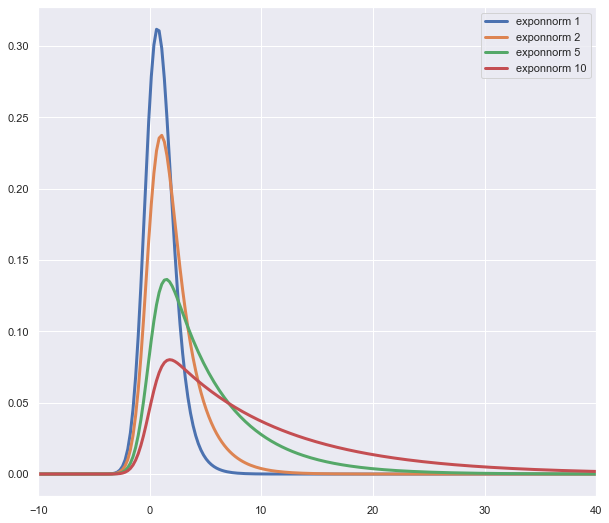

In [66]:
fig, ax = plt.subplots(1, 1)
for k in K:
    ax.plot(x, exponnorm.pdf(x, k), lw=3, label=f'exponnorm {k}')
ax.legend()
ax.set_xlim(-10,40)

* 누적 확률 분포

(-10.0, 40.0)

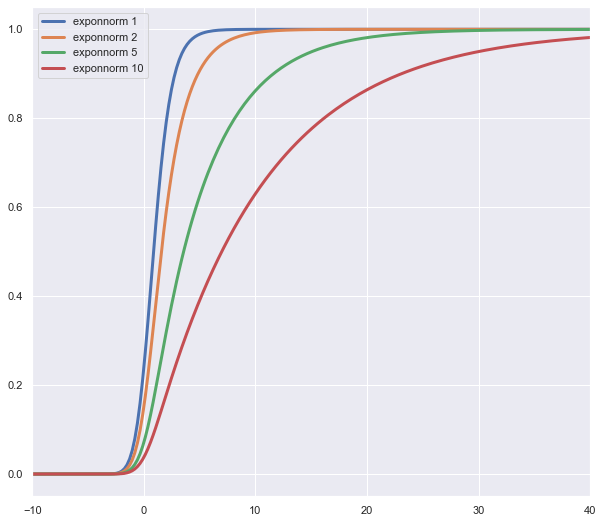

In [67]:
fig, ax = plt.subplots(1, 1)
for k in K:
    ax.plot(x, exponnorm.cdf(x, k), lw=3, label=f'exponnorm {k}')
ax.legend()
ax.set_xlim(-10,40)

### 지수분포 -  exponpow

* 확률분포

In [115]:
x = np.linspace(-1,2,300)
B = [2,4,8,15]

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:1783: RuntimeWarning: overflow encountered in exp
  f = 1 + np.log(b) + sc.xlogy(b - 1.0, x) + xb - np.exp(xb)


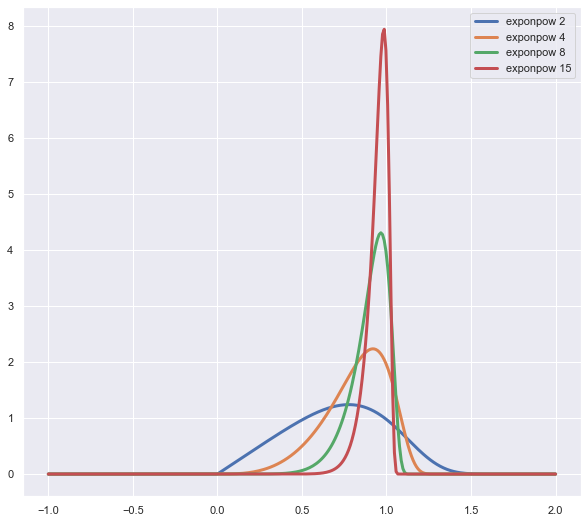

In [116]:
fig, ax = plt.subplots(1, 1)
for b in B:
    ax.plot(x, exponpow.pdf(x, b), lw=3, label=f'exponpow {b}')
ax.legend()

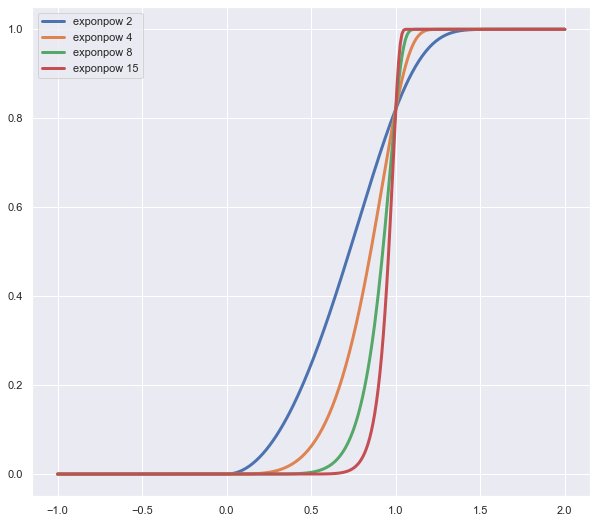

In [117]:
fig, ax = plt.subplots(1, 1)
for b in B:
    ax.plot(x, exponpow.cdf(x, b), lw=3, label=f'exponpow {b}')
ax.legend()

### 균등분포

In [107]:
uniform.ppf(0.99)

0.99

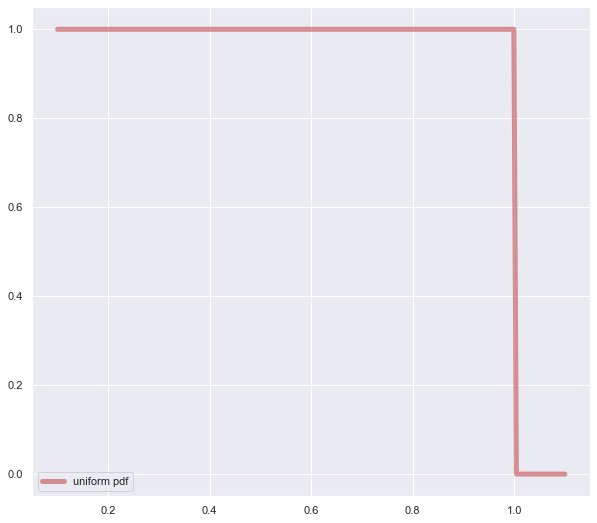

In [119]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0.1,1.1,200)
ax.plot(x, uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')
ax.legend()

### 베타분포

In [159]:
A = [0.5,1,2]
B = [0.5,1,2]
x = np.linspace(-0.5,1.5,100)

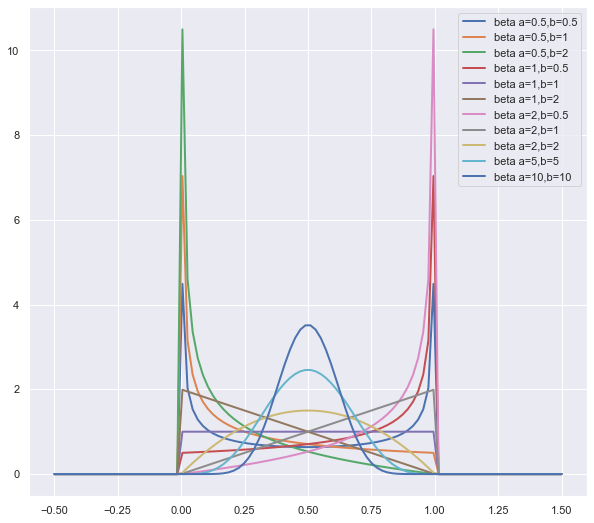

In [157]:
fig, ax = plt.subplots(1, 1)
for a in A:
    for b in B:
        ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
        
a=b=5
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=b=10
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
ax.legend()

α,β가 모두 1보다 클 때

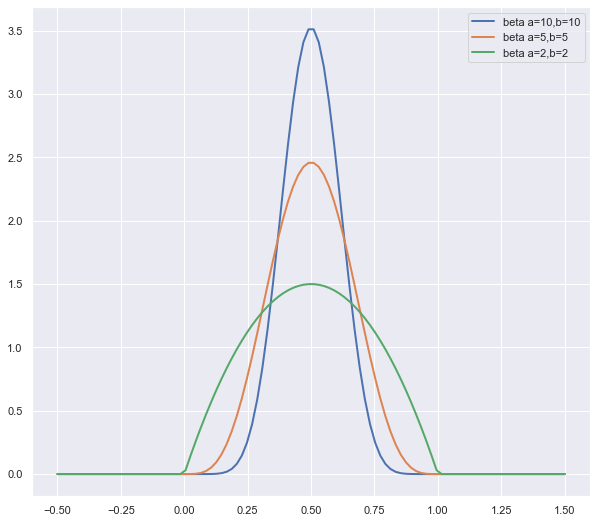

In [173]:
fig, ax = plt.subplots(1, 1)
a=b=10
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=b=5
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=b=2
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
ax.legend()

α,β 중 하나 이상이 1일 때

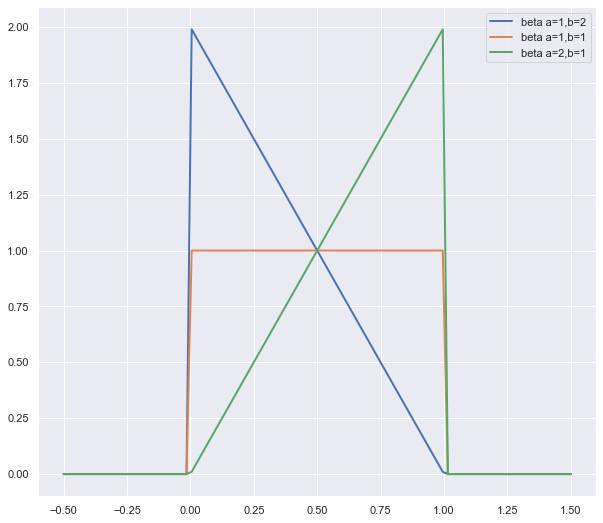

In [172]:
fig, ax = plt.subplots(1, 1)
a=1;b=2
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=1;b=1
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=2;b=1
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
ax.legend()

* α,β가 모두 1보다 작을 때

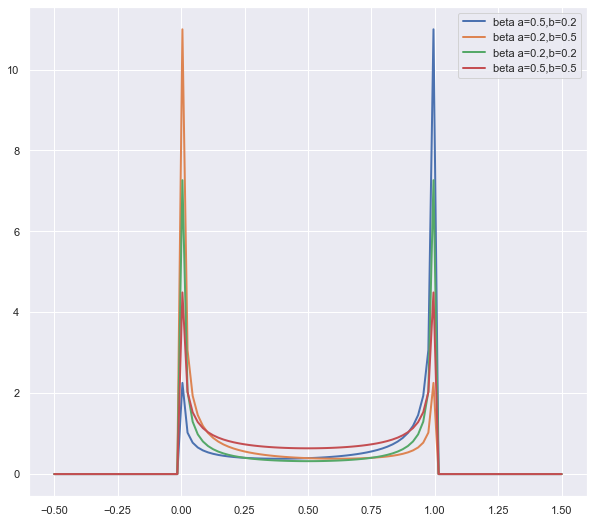

In [174]:
fig, ax = plt.subplots(1, 1)
a=0.5;b=0.2
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=0.2;b=0.5
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=0.2;b=0.2
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=0.5;b=0.5
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
ax.legend()

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

In [2]:
bern = sp.stats.bernoulli(0.5)

* 확률 분포


In [3]:
bern.pmf([0,1,1,1,0,0,0.5])

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0. ])

* 누적 확률 분포


In [4]:
bern.cdf([0,1,1,1,0,0,0.5])

array([0.5, 1. , 1. , 1. , 0.5, 0.5, 0.5])

* 표본 추출

In [5]:
count=0
for i in bern.rvs(100):
    if i == 1:
        count+=1
count

56

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



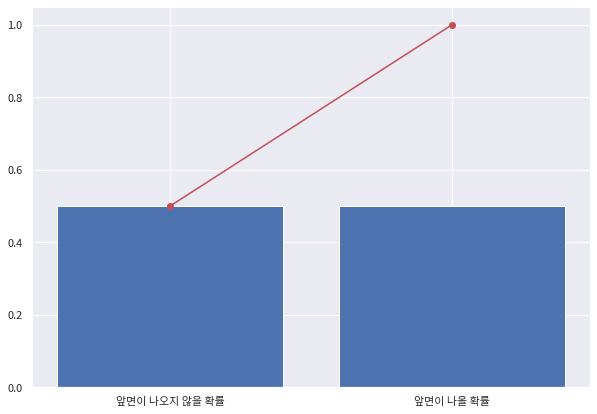

In [104]:
label = ["앞면이 나오지 않을 확률", "앞면이 나올 확률"]
p = 0.5
x = [0,1]
plt.bar(x, bernoulli.pmf(x, p))
plt.xticks(x, labels=label)

plt.plot(x,  bernoulli.cdf(x,p), marker="o", color = "r",  label="누적확률함수")

#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


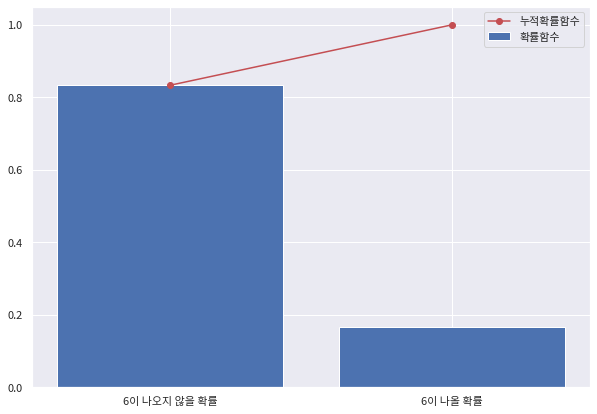

In [105]:
bern = sp.stats.bernoulli(1/6)
x = [0, 1]
label = ["6이 나오지 않을 확률", "6이 나올 확률"]

# 확률 함수
P = bern.pmf(x)
plt.bar(x, P, label="확률함수")
plt.xticks(x, labels=label)

# 누적 확률함수
F = bern.cdf(x)
plt.plot(x, F, marker="o", color = "r",  label="누적확률함수")

plt.legend()
plt.show()

#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


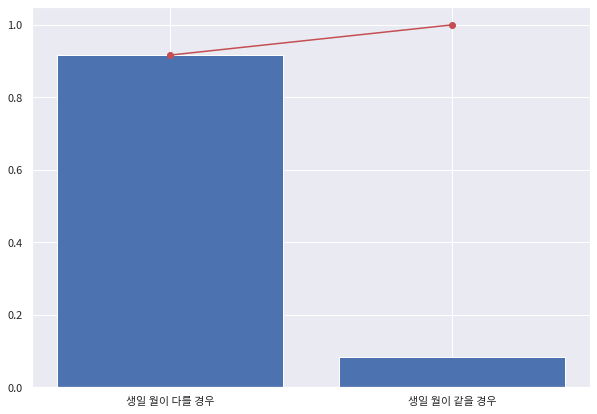

In [106]:
# 모든 경우의 수12*12
# 같은 월일 경우의수 12

label = ["생일 월이 다를 경우", "생일 월이 같을 경우"]
p = 1/12
x = [0,1]
plt.bar(x, bernoulli.pmf(x, p))
plt.xticks(x, labels=label)

plt.plot(x,  bernoulli.cdf(x,p), marker="o", color = "r",  label="누적확률함수")

#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

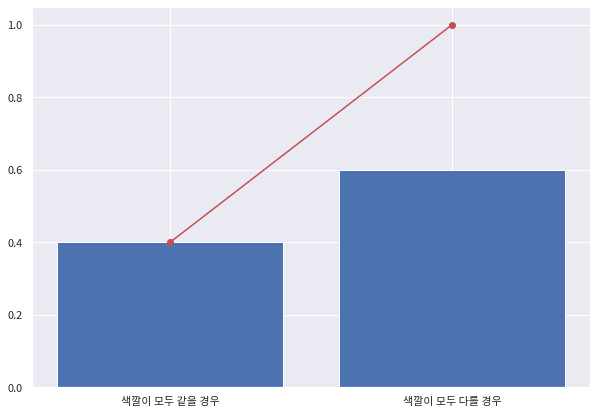

In [107]:
# 1C3 * 1C2 / 2C5
p = (3*2)/(5*4/2*1)
label = ["색깔이 모두 같을 경우", "색깔이 모두 다를 경우"]
x = [0,1]
plt.bar(x, bernoulli.pmf(x, p))
plt.xticks(x, labels=label)

plt.plot(x,  bernoulli.cdf(x,p), marker="o", color = "r",  label="누적확률함수")

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

In [108]:
# 베르누이 실행을 N번 한 결과의 확률
N, mu = 10, 0.5
binoms = sp.stats.binom(N, mu)

* 확률 분포


In [109]:
binoms.pmf(np.arange(11))

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

* 누적 확률  분포

In [110]:
x = np.arange(1,10)

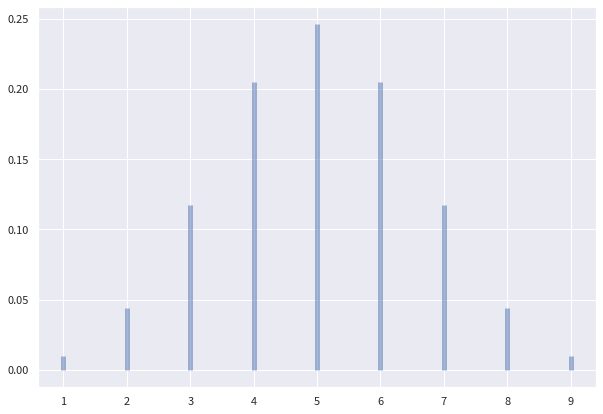

In [111]:
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, binom.pmf(x, N, mu), colors='b', lw=5, alpha=0.5)

* 확률 변수 표본 추출


In [112]:
N, mu = 10, 0.5
binom.rvs(N, mu, size=100)

array([4, 6, 7, 4, 6, 5, 7, 6, 2, 4, 6, 8, 4, 6, 8, 7, 5, 1, 5, 7, 8, 5,
       4, 5, 6, 3, 3, 5, 3, 3, 4, 5, 5, 4, 6, 6, 4, 5, 4, 2, 6, 4, 4, 6,
       5, 4, 6, 3, 2, 6, 4, 4, 5, 4, 4, 2, 5, 5, 6, 8, 6, 5, 3, 5, 6, 7,
       6, 3, 5, 7, 5, 4, 5, 5, 6, 5, 5, 5, 7, 8, 6, 6, 5, 5, 7, 4, 3, 6,
       4, 7, 7, 5, 6, 6, 4, 7, 8, 2, 7, 4])

#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



In [113]:
def binom_plot(N,mu):
    N=N
    mu = mu

    x = np.arange(N+1)
    fig, ax = plt.subplots(1, 1)
    label = [str(i)+"번" for i in x]

    # ax.vlines(x, 0, binom.pmf(x, N, mu), colors='b', lw=5, alpha=0.5)
    plt.bar(x,binom.pmf(x, N, mu), label="확률 분포")
    plt.xticks(x, labels=label)
    plt.plot(x,  binom.cdf(x, N, mu), marker="o", color = "r",  label="누적확률함수")
    plt.tick_params(axis="x", labelrotation=90)
    plt.legend()

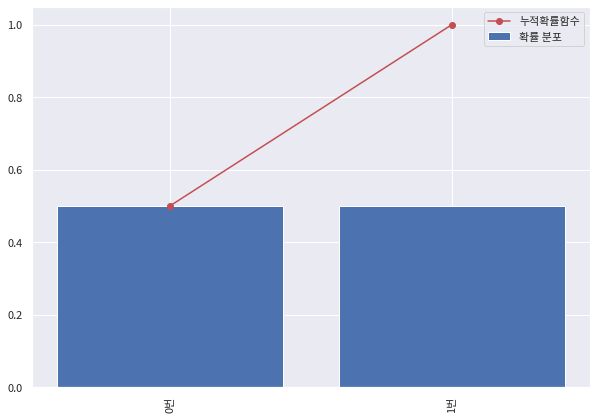

In [114]:
binom_plot(1,0.5)

* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포


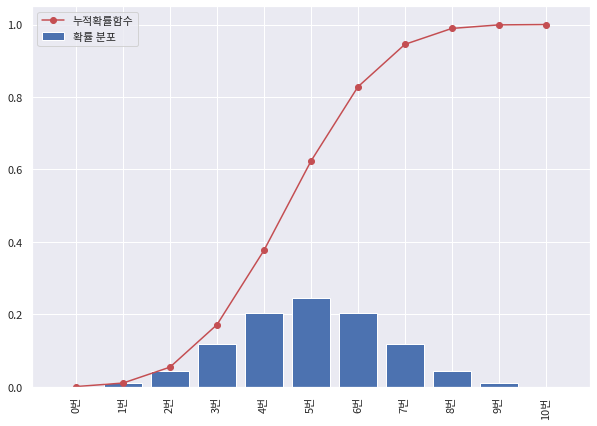

In [115]:
binom_plot(10,0.5)

#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

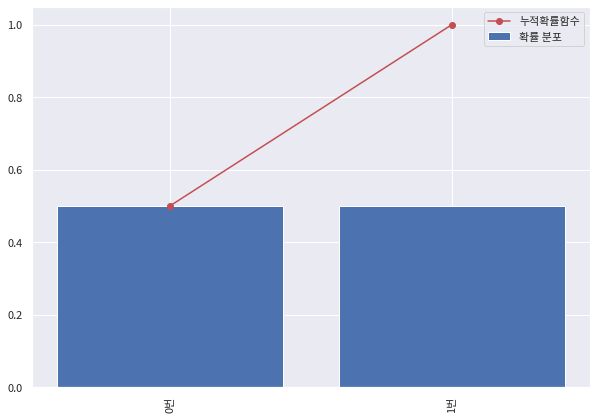

In [116]:
binom_plot(1,0.5)

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

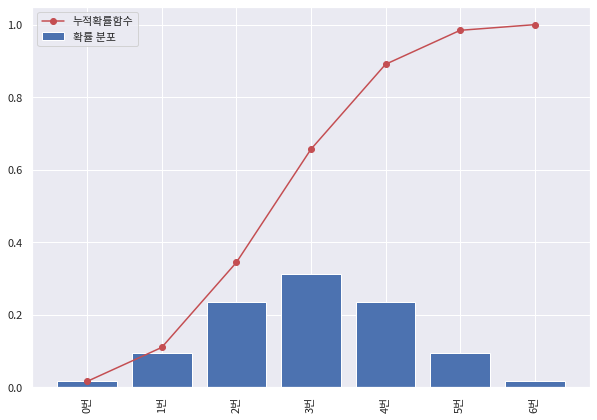

In [117]:
binom_plot(6,0.5)

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

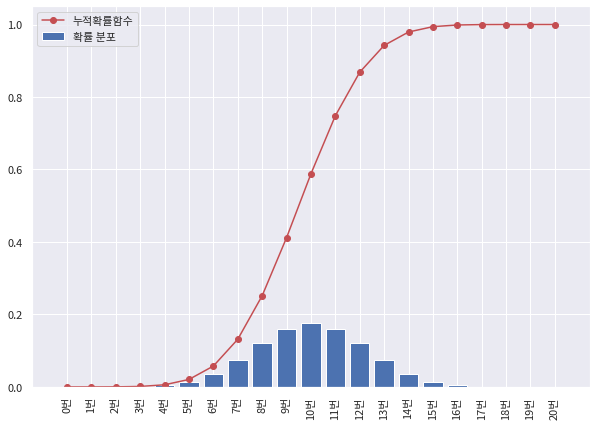

In [119]:
binom_plot(20,0.5)

* 주사위를 1번 던져서 6이 나온 횟수의 분포

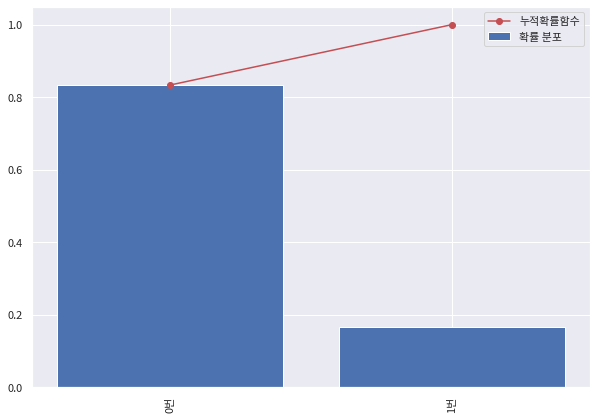

In [121]:
binom_plot(1,1/6)

* 주사위를 6번 던져서 6이 나온 횟수의 분포

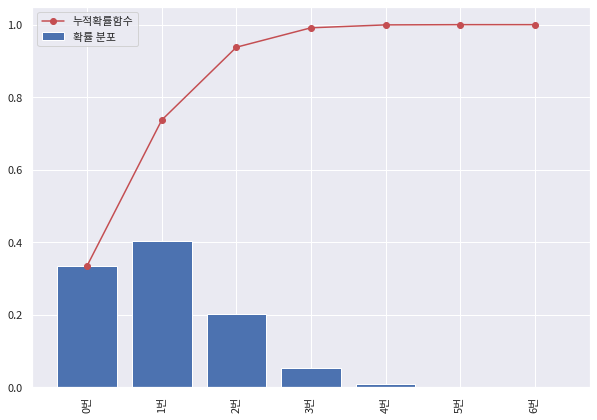

In [122]:
binom_plot(6,1/6)

* 주사위를 20번 던져서 6이 나온 횟수의 분포

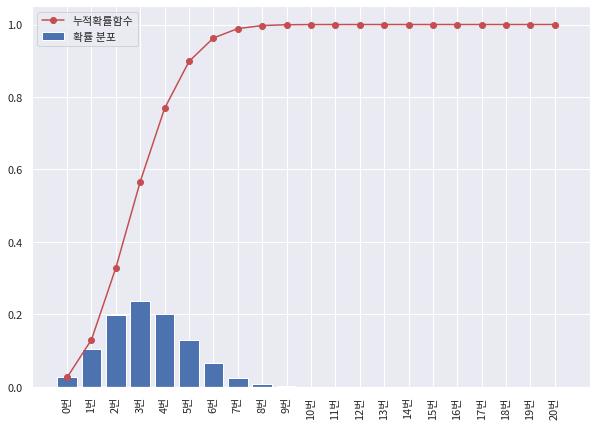

In [123]:
binom_plot(20,1/6)

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

In [125]:
# x=(1,0,0,…,0)
# multinomial(N, mu)
# N 번시행
# mu : 확률 벡터
mult = sp.stats.multinomial(8, [0.3,0.2,0.5])

* 확률 분포


In [127]:
# [ ] 안의 값의 합이 N 이 어야한다.
mult.pmf([1,3,4]), mult.pmf([2,2,4]), mult.pmf([2,3,3])

(0.04200000000000007, 0.09450000000000003, 0.0504000000000001)

* 표본 추출


In [129]:
mult.rvs(10)

array([[2, 2, 4],
       [1, 1, 6],
       [2, 1, 5],
       [0, 4, 4],
       [1, 1, 6],
       [3, 2, 3],
       [3, 3, 2],
       [1, 3, 4],
       [1, 2, 5],
       [2, 0, 6]])

#### **예제 01.공정하지 않은 주사위**

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그리세요.

In [159]:
def mult_plot(N,mu,px):
    mult = sp.stats.multinomial(1, mu)
    x=[]
    ex = np.zeros(N)
    for i in range(N):
        ex[i] = 1
        x.append(ex)
        ex = np.zeros(N)
    plt.bar(px,mult.pmf(x))

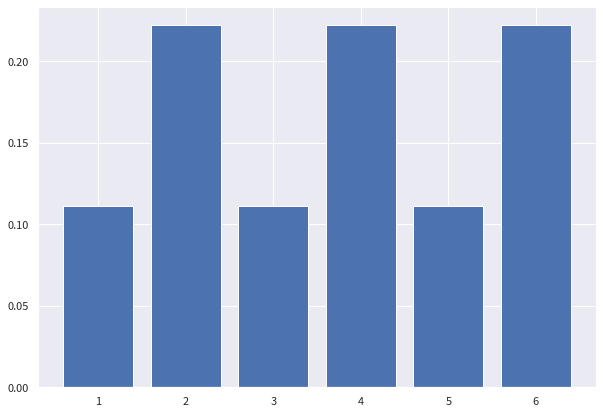

In [161]:
mult_plot(6,[1/9, 2/9, 1/9, 2/9, 1/9, 2/9],[1,2,3,4,5,6])

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

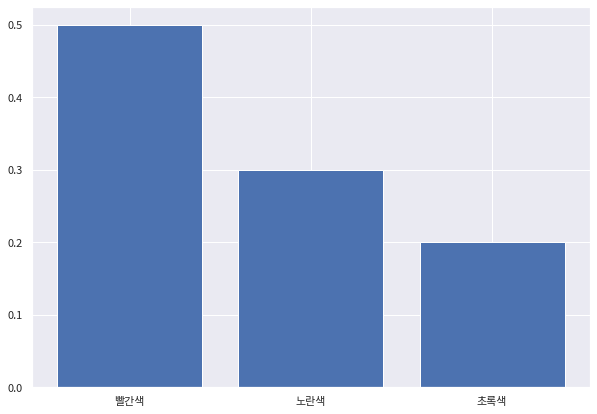

In [160]:
mult_plot(3,[5/10,3/10,2/10],["빨간색","노란색","초록색"])

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.

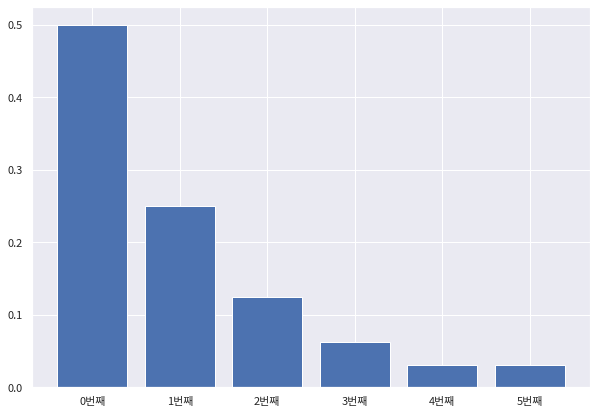

In [162]:
def funx(x):
    return 1/(2**(x+1))

mu = [funx(i) for i in range(6)]
px = [str(i)+"번째" for i in range(6)] 
mult_plot(6,mu,px)